## Automating Crypo Website API

In [29]:
# how to use an API
# crypto: coinmarketcap.com

# API documentation
# This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # this and the key below need to be changed
# I notice that without using my own key, some data is not accessible. So I'll modify the key eventually but keep the data.
parameters = {
  'start':'1',
  'limit':'15', # originally it's 5000; change it to 15 to save time and make it simpler
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '08e6f59c-1ccd-4381-933c-099b4d2a15bb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-10T03:30:40.404Z', 'error_code': 0, 'error_message': None, 'elapsed': 95, 'credit_count': 1, 'notice': None, 'total_count': 9601}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10207, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None) # shows all columns without ...
pd.set_option('display.max_rows', None)

In [7]:
# This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['data'])

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,last_updated,date_added,tags,platform,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,7850,y74ou5jlxf,qh17dr41m6,bqt21v4fvn,727,816,5551,9251,9485,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[bq412n86fso, 01emkyi3502t, spa6pbnbre, ecd9q1...",None,None,None,0.366802,9642,0.102252,0.270499,0.253225,0.300975,0.211657,1936,0.518475,2023-05-10T03:10:04.555Z
1,5763,3c4f45xpltl,80a8qoibka6,rv9sw6jynhi,374,1843,3077,70,6568,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[1x4tzf1td31, 8geohc3n2el, dbs9lowt72h, 0y9dk2...",None,None,None,0.769590,5095,0.235088,0.886590,0.054358,0.265684,0.738804,5968,0.558492,2023-05-10T03:10:04.555Z
2,674,1ndvq5hy4ux,tt0rf82414f,soljldo4lle,7750,6422,1080,2132,9702,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[lpdk0ya84ef, p8rnc39e3q, 1281iawc3kp, dmmxjlh...",None,None,None,0.200312,4972,0.717154,0.364285,0.833029,0.529254,0.543585,1090,0.865699,2023-05-10T03:10:04.555Z
3,6098,oycmm14jqgh,v88wj8oampm,uozzcmgiv,4285,7524,7563,1732,3270,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[6u80rtkd51, vg5j8yb5e4g, bnp68g5a0ql, mt7jmeo...",None,None,None,0.585307,576,0.679701,0.884703,0.457253,0.608517,0.066826,5470,0.765181,2023-05-10T03:10:04.555Z
4,195,g311piq3vyt,20o64br3c28,xiycjx9doyr,9327,5006,1764,2672,1143,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[6pq1fd168n6, girh8la1xgr, rsnazz051ud, qwqz26...",None,None,None,0.130493,5536,0.112398,0.554141,0.817405,0.818658,0.701432,7668,0.053795,2023-05-10T03:10:04.555Z
5,1706,pmsd59ter8k,drp5z2nzxub,lfcrrulq1w9,4800,9457,3072,8262,9952,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[udljj9yi4kh, u6liaqeolaq, dnnaxx19jg, zx24cvr...",None,None,None,0.433871,7289,0.270936,0.053450,0.154350,0.855383,0.011871,7638,0.237240,2023-05-10T03:10:04.555Z
6,1605,qrb9qix9wk,fbidyeemhsf,kq6tksut8c,6072,6087,8193,1021,5840,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[qj3jxof5nn, d2sn9m214vo, e4nhtcl8psw, pejtc0k...",None,None,None,0.370282,8765,0.427025,0.998791,0.746418,0.328416,0.087247,4712,0.228774,2023-05-10T03:10:04.555Z
7,6467,bkr7uiefcfs,7zzhioaup8v,siy28p92ixb,3922,8590,542,8712,4290,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[ias903e45xn, fb6gdkh4krt, zk0unssogy, xr7ez53...",None,None,None,0.261718,6235,0.220503,0.285587,0.673985,0.481494,0.892243,8569,0.292468,2023-05-10T03:10:04.555Z
8,9088,h5988jt6u6l,kidvx462q18,3zq7vrvpyvl,508,2588,8134,6426,8234,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[tavv32h1te, m4ev2b2g8, 21zbe58xoc1, 0t62jxsv8...",None,None,None,0.113893,1715,0.389302,0.430744,0.769338,0.111856,0.733080,7177,0.730967,2023-05-10T03:10:04.555Z
9,8095,52o868zi6yc,rr86u2n2rr,zz1fmc62jk,3331,9380,837,7111,9443,None,2023-05-10T03:10:04.555Z,2023-05-10T03:10:04.555Z,"[640sp41lnpk, vlu494vadjf, kxho9umupf, qtempxi...",None,None,None,0.663856,4074,0.150882,0.581028,0.378414,0.077441,0.206519,4104,0.517251,2023-05-10T03:10:04.555Z


In [8]:
# add timestamp before setting up automation
pd.to_datetime('now')

Timestamp('2023-05-10 03:01:57.247230')

In [30]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [22]:
df
# there's a column called 'last_updated', which is quite close to the timestamp
# if using the default url and key, the name and symbol won't be displayed correctly

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19368793.00000,19368793.00000,False,nan,1,nan,nan,None,2023-05-10T03:25:00.000Z,27693.85663,14012724506.57294,-22.50340,-0.10387,0.37445,-2.77242,-2.18378,34.53077,22.37831,536396576347.17780,46.95920,581570989131.37000,None,2023-05-10T03:25:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:26:37.028116
1,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120317700.84569,120317700.84569,False,nan,2,nan,nan,None,2023-05-10T03:25:00.000Z,1845.23449,6086227070.80697,-31.40410,-0.12236,0.10564,-0.85606,-0.68727,26.01336,13.57993,222014371656.43973,19.43640,222014371656.44000,None,2023-05-10T03:25:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:26:37.028116
2,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,82479410640.99255,86090638896.21469,False,nan,3,nan,nan,None,2023-05-10T03:25:00.000Z,1.00035,21907547301.10328,-28.13760,-0.00952,-0.04240,-0.00594,-0.01673,-1.36986,0.02103,82508474770.49347,7.22330,86120975551.85001,None,2023-05-10T03:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:26:37.028116
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155860823.16433,155860823.16433,False,nan,4,nan,nan,None,2023-05-10T03:25:00.000Z,313.34418,460264308.26755,-23.38110,-0.08588,-0.18204,-3.43451,0.16760,12.21868,-2.19428,48838082131.85621,4.27560,48838082131.86000,None,2023-05-10T03:25:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:26:37.028116
4,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,30151774997.20993,30151774997.20993,False,nan,5,nan,nan,None,2023-05-10T03:25:00.000Z,0.99988,2944498740.47083,-27.26380,-0.01241,-0.01896,-0.01092,0.01568,0.22999,0.00045,30148255548.27980,2.63930,30148255548.28000,None,2023-05-10T03:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:26:37.028116
5,52,XRP,XRP,xrp,941,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,nan,6,nan,nan,None,2023-05-10T03:25:00.000Z,0.43256,867924218.16931,-25.21010,0.05520,1.57570,-6.63286,-14.05422,16.79297,10.63838,22422753475.87247,1.96300,43255586861.93000,None,2023-05-10T03:25:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:26:37.028116
6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841954554.60500,35761344982.35800,False,nan,7,nan,nan,None,2023-05-10T03:25:00.000Z,0.36457,191751773.08238,-32.57740,-0.22078,-0.21315,-5.67466,-5.64002,14.40039,-4.74811,12702435023.88894,1.11200,16405783871.26000,None,2023-05-10T03:25:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:26:37.028116
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139281716383.70526,139281716383.70526,False,nan,8,nan,nan,None,2023-05-10T03:25:00.000Z,0.07325,234753243.99641,-42.41950,-0.07160,1.12196,-6.41569,-11.50152,9.47398,-15.77700,10202447251.21136,0.89320,10202447251.21000,None,2023-05-10

In [31]:
# create the automation process

def api_runner():
    global df # note that this df actually was defined in the previous cell
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15', # originally it's 5000; change it to 15 to save time and make it simpler
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '08e6f59c-1ccd-4381-933c-099b4d2a15bb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    df = df.append(df2)


In [32]:
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(20) # it sleeps every 20 second/ 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [33]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19368793.00000,19368793.00000,False,nan,1,nan,nan,None,2023-05-10T03:29:00.000Z,27686.70353,14007587813.00298,-22.54220,-0.23666,0.34689,-2.93737,-2.23806,34.42779,22.59032,536258029571.49963,46.94330,581420774180.47998,None,2023-05-10T03:29:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:30:45.255268
1,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120317700.84569,120317700.84569,False,nan,2,nan,nan,None,2023-05-10T03:29:00.000Z,1844.83614,6086537856.42704,-31.40120,-0.25315,0.11744,-0.96205,-0.77471,26.02209,13.78216,221966442657.06915,19.43060,221966442657.07001,None,2023-05-10T03:29:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:30:45.255268
2,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,82479410640.99255,86090638896.21469,False,nan,3,nan,nan,None,2023-05-10T03:29:00.000Z,1.00028,21897000300.69156,-28.17630,-0.02031,-0.05274,-0.01233,-0.04411,-1.69901,0.01293,82502486296.49147,7.22220,86114724882.14999,None,2023-05-10T03:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:30:45.255268
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155860823.16433,155860823.16433,False,nan,4,nan,nan,None,2023-05-10T03:29:00.000Z,313.28529,459952555.74985,-23.41740,-0.10658,-0.21709,-3.54275,0.12688,12.19757,-2.07305,48828902869.29572,4.27440,48828902869.30000,None,2023-05-10T03:29:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:30:45.255268
4,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,30151774997.20993,30151774997.20993,False,nan,5,nan,nan,None,2023-05-10T03:29:00.000Z,0.99986,2944957071.05279,-27.20950,-0.01835,-0.01688,-0.00753,-0.00942,0.27141,0.02281,30147542324.18982,2.63910,30147542324.19000,None,2023-05-10T03:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:30:45.255268
5,52,XRP,XRP,xrp,941,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,nan,6,nan,nan,None,2023-05-10T03:29:00.000Z,0.43268,868226440.36117,-25.13630,0.05877,1.66670,-6.70003,-14.07059,16.77128,10.72442,22429213947.57024,1.96340,43268049715.57000,None,2023-05-10T03:29:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:30:45.255268
6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841954554.60500,35761344982.35800,False,nan,7,nan,nan,None,2023-05-10T03:29:00.000Z,0.36454,191652570.11878,-32.54150,-0.22262,-0.21992,-5.79142,-5.72326,14.41672,-4.51363,12701211547.04782,1.11180,16404203694.18000,None,2023-05-10T03:29:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:30:45.255268
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,139281716383.70526,139281716383.70526,False,nan,8,nan,nan,None,2023-05-10T03:29:00.000Z,0.07322,234567989.81262,-42.44500,-0.14388,1.06333,-6.53983,-11.62717,9.48168,-15.65963,10198149631.44532,0.89290,10198149631.45000,None,2023-05-1

In [38]:
# now try to save the results in a csv file
def api_runner_toCsv():
    global df # note that this df actually was defined in the previous cell
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # this and the key below need to be changed
    # I notice that without using my own key, some data is not accessible. So I'll modify the key eventually but keep the data.
    parameters = {
      'start':'1',
      'limit':'15', # originally it's 5000; change it to 15 to save time and make it simpler
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '08e6f59c-1ccd-4381-933c-099b4d2a15bb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'C:\Users\zxy23\Study\Data Analysis\Bootcamp\API.csv'):
        df.to_csv(r'C:\Users\zxy23\Study\Data Analysis\Bootcamp\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\zxy23\Study\Data Analysis\Bootcamp\API.csv', mode = 'a', header = 'column_names')

In [39]:
for i in range(5):
    api_runner_toCsv()
    print('API Runner completed')
    sleep(20) # it sleeps every 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [42]:
dfApi = pd.read_csv(r'C:\Users\zxy23\Study\Data Analysis\Bootcamp\API.csv')
dfApi

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19368793.0,19368793.0,False,NaN,1,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,27690.120367945194,14006574387.915121,-22.5435,-0.22279765,0.34589662,-2.92082657,-2.23840058,34.41265443,22.76201343,536324209551.8143,46.9673,581492527726.85,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
1,1.00000,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.8456904,120317700.8456904,False,NaN,2,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1844.6532743676348,6087257100.65437,-31.4194,-0.28271839,0.08459006,-0.94760464,-0.78796421,26.08133297,13.90635876,221944440829.38834,19.4363,221944440829.39,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
2,2.00000,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1.0004523480605052,21899713182.00191,-28.1406,-0.01666632,-0.04195046,0.01333156,-0.01202501,-1.70281184,0.03326318,82516720042.42761,7.2234,86129581829.75,NaN,2023-05-10T03:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:33:21.734865
3,3.00000,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860823.16433185,155860823.16433185,False,NaN,4,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,313.22806699804676,460180323.8226744,-23.3156,-0.14938524,-0.23887535,-3.57661647,0.09950527,12.25538923,-2.10900176,48819984360.48805,4.2753,48819984360.49,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
4,4.00000,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30151774997.209927,30151774997.209927,False,NaN,5,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1.0000175104060767,2944810223.9604216,-27.2142,-0.00589791,0.00068804,0.01546317,0.02327833,0.26553397,0.03443065,30152302967.03406,2.6405,30152302967.03,NaN,2023-05-10T03:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:33:21.734865
5,5.00000,52,XRP,XRP,xrp,941,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,51837820505.0,99988965239.0,False,NaN,6,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,0.43253665657128965,867878203.3040041,-25.0603,-0.04963292,1.65415011,-6.78518309,-14.10047976,16.71286823,10.79311438,22421757565.175343,1.9635,43253665657.13,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
6,6.00000,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.0,34841954554.605,35761344982.358,False,NaN,7,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,0.3643934050846764,191556981.68937427,-32.3599,-0.29617509,-0.27143959,-5.83065557,-5.75973115,14.3761466,-4.47153395,12696178459.958067,1.1118,16397703228.81,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
7,7.00000,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139281716383.70526,139281716383.70

In [18]:
# change scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [43]:
dfApi.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19368793.0,19368793.0,False,NaN,1,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,27690.120367945194,14006574387.915121,-22.5435,-0.22279765,0.34589662,-2.92082657,-2.23840058,34.41265443,22.76201343,536324209551.8143,46.9673,581492527726.85,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
1,1.00000,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.8456904,120317700.8456904,False,NaN,2,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1844.6532743676348,6087257100.65437,-31.4194,-0.28271839,0.08459006,-0.94760464,-0.78796421,26.08133297,13.90635876,221944440829.38834,19.4363,221944440829.39,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
2,2.00000,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82479410640.99255,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1.0004523480605052,21899713182.00191,-28.1406,-0.01666632,-0.04195046,0.01333156,-0.01202501,-1.70281184,0.03326318,82516720042.42761,7.2234,86129581829.75,NaN,2023-05-10T03:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:33:21.734865
3,3.00000,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860823.16433185,155860823.16433185,False,NaN,4,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,313.22806699804676,460180323.8226744,-23.3156,-0.14938524,-0.23887535,-3.57661647,0.09950527,12.25538923,-2.10900176,48819984360.48805,4.2753,48819984360.49,NaN,2023-05-10T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 03:33:21.734865
4,4.00000,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30151774997.209927,30151774997.209927,False,NaN,5,NaN,NaN,NaN,2023-05-10T03:31:00.000Z,1.0000175104060767,2944810223.9604216,-27.2142,-0.00589791,0.00068804,0.01546317,0.02327833,0.26553397,0.03443065,30152302967.03406,2.6405,30152302967.03,NaN,2023-05-10T03:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:33:21.734865


In [44]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19368793.00000,19368793.00000,False,nan,1,nan,nan,None,2023-05-10T03:31:00.000Z,27690.12037,14006574387.91512,-22.54350,-0.22280,0.34590,-2.92083,-2.23840,34.41265,22.76201,536324209551.81427,46.96730,581492527726.84998,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
1,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120317700.84569,120317700.84569,False,nan,2,nan,nan,None,2023-05-10T03:31:00.000Z,1844.65327,6087257100.65437,-31.41940,-0.28272,0.08459,-0.94760,-0.78796,26.08133,13.90636,221944440829.38834,19.43630,221944440829.39001,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
2,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,82479410640.99255,86090638896.21469,False,nan,3,nan,nan,None,2023-05-10T03:31:00.000Z,1.00045,21899713182.00191,-28.14060,-0.01667,-0.04195,0.01333,-0.01203,-1.70281,0.03326,82516720042.42761,7.22340,86129581829.75000,None,2023-05-10T03:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:33:41.834089
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155860823.16433,155860823.16433,False,nan,4,nan,nan,None,2023-05-10T03:31:00.000Z,313.22807,460180323.82267,-23.31560,-0.14939,-0.23888,-3.57662,0.09951,12.25539,-2.10900,48819984360.48805,4.27530,48819984360.49000,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
4,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,30151774997.20993,30151774997.20993,False,nan,5,nan,nan,None,2023-05-10T03:31:00.000Z,1.00002,2944810223.96042,-27.21420,-0.00590,0.00069,0.01546,0.02328,0.26553,0.03443,30152302967.03406,2.64050,30152302967.03000,None,2023-05-10T03:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:33:41.834089


In [61]:
# several columns we want to look into: percentage change 1h/ 24h /7d, etc. 
# we can group df by Name (bitcoin, ethereum)
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [62]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.22280,0.34590,-2.92083,-2.23840,34.41265,22.76201
Ethereum,-0.28272,0.08459,-0.94760,-0.78796,26.08133,13.90636
Tether,-0.01667,-0.04195,0.01333,-0.01203,-1.70281,0.03326
BNB,-0.14939,-0.23888,-3.57662,0.09951,12.25539,-2.10900
USD Coin,-0.00590,0.00069,0.01546,0.02328,0.26553,0.03443
XRP,-0.04963,1.65415,-6.78518,-14.10048,16.71287,10.79311
Cardano,-0.29618,-0.27144,-5.83066,-5.75973,14.37615,-4.47153
Dogecoin,-0.20818,1.00865,-6.56419,-11.68371,9.44350,-15.56882
Solana,-0.27072,0.08536,-5.40777,2.04293,12.25381,-7.46762


In [63]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.22280
             quote.USD.percent_change_24h     0.34590
             quote.USD.percent_change_7d     -2.92083
             quote.USD.percent_change_30d    -2.23840
             quote.USD.percent_change_60d    34.41265
             quote.USD.percent_change_90d    22.76201
Ethereum     quote.USD.percent_change_1h     -0.28272
             quote.USD.percent_change_24h     0.08459
             quote.USD.percent_change_7d     -0.94760
             quote.USD.percent_change_30d    -0.78796
             quote.USD.percent_change_60d    26.08133
             quote.USD.percent_change_90d    13.90636
Tether       quote.USD.percent_change_1h     -0.01667
             quote.USD.percent_change_24h    -0.04195
             quote.USD.percent_change_7d      0.01333
             quote.USD.percent_change_30d    -0.01203
             quote.USD.percent_change_60d    -1.70281
             quote.USD.percent_change_90

In [48]:
type(df4)

pandas.core.series.Series

In [64]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.22280
            quote.USD.percent_change_24h   0.34590
            quote.USD.percent_change_7d   -2.92083
            quote.USD.percent_change_30d  -2.23840
            quote.USD.percent_change_60d  34.41265
            quote.USD.percent_change_90d  22.76201
Ethereum    quote.USD.percent_change_1h   -0.28272
            quote.USD.percent_change_24h   0.08459
            quote.USD.percent_change_7d   -0.94760
            quote.USD.percent_change_30d  -0.78796
            quote.USD.percent_change_60d  26.08133
            quote.USD.percent_change_90d  13.90636
Tether      quote.USD.percent_change_1h   -0.01667
            quote.USD.percent_change_24h  -0.04195
            quote.USD.percent_change_7d    0.01333
            quote.USD.percent_change_30d  -0.01203
            quote.USD.percent_change_60d  -1.70281
            quote.USD.percent_change_90d   0.03326
BNB         quote.USD.percent_change_1h   -0.14939
            quote.USD.percent_change_24h  -0.23888
            quote.USD.percent_change_7d   -3.57662
            quote.USD.percent_change_30d   0.09951
            quote.USD.percent_change_60d  12.25539
            quote.USD.percent_change_90d  -2.10900
USD Coin    quote.USD.percent_change_1h   -0.00590
            quote.USD.percent_change_24h   0.00069
            quote.USD.percent_change_7d    0.01546
            quote.USD.percent_change_30d   0.02328
            quote.USD.percent_change_60d   0.26553
            quote.USD.percent_change_90d   0.03443
XRP         quote.USD.percent_change_1h   -0.04963
            quote.USD.percent_change_24h   1.65415
            quote.USD.percent_change_7d   -6.78518
            quote.USD.percent_change_30d -14.10048
            quote.USD.percent_change_60d  16.71287
            quote.USD.percent_change_90d  10.79311
Cardano     quote.USD.percent_change_1h   -0.29618
            quote.USD.percent_change_24h  -0.27144
            quote.USD.percent_change_7d   -5.83066
            quote.USD.percent_change_30d  -5.75973
            quote.USD.percent_change_60d  14.37615
            quote.USD.percent_change_90d  -4.47153
Dogecoin    quote.USD.percent_change_1h   -0.20818
            quote.USD.percent_change_24h   1.00865
            quote.USD.percent_change_7d   -6.56419
            quote.USD.percent_change_30d -11.68371
            quote.USD.percent_change_60d   9.44350
            quote.USD.percent_change_90d -15.56882
Solana      quote.USD.percent_change_1h   -0.27072
            quote.USD.percent_change_24h   0.08536
            quote.USD.percent_change_7d   -5.40777
            quote.USD.percent_change_30d   2.04293
            quote.USD.percent_change_60d  12.25381
            quote.USD.percent_change_90d  -7.46762
Polygon     quote.USD.percent_change_1h   -0.52158
            quote.USD.percent_change_24h  -2.66660
            quote.USD.percent_change_7d   -9.70176
            quote.USD.percent_change_30d -19.95463
            quote.USD.percent_change_60d -17.53400
            quote.USD.percent_change_90d -29.89063
Polkadot    quote.USD.percent_change_1h   -0.23108
            quote.USD.percent_change_24h  -0.44326
            quote.USD.percent_change_7d   -6.05313
            quote.USD.percent_change_30d -13.46702
            quote.USD.percent_change_60d  -4.89983
            quote.USD.percent_change_90d -18.87698
TRON        quote.USD.percent_change_1h   -0.19608
            quote.USD.percent_change_24h   1.28390
            quote.USD.percent_change_7d   -0.47799
            quote.USD.percent_change_30d   4.02852
            quote.USD.percent_change_60d  19.94142
            quote.USD.percent_change_90d   7.56483
Litecoin    quote.USD.percent_change_1h   -0.71465
            quote.USD.percent_change_24h   2.47841
            quote.USD.percent_change_7d   -8.99800
            quote.USD.percent_change_30d -11.77787
            quote.USD.percent_change_60d   9.78905
            quo

In [50]:
type(df5)

pandas.core.frame.DataFrame

In [65]:
df5.count()

values    90
dtype: int64

In [66]:
df5.count().values[0]

90

In [67]:
index = pd.Index(range(df5.count().values[0]))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22280
1,Bitcoin,quote.USD.percent_change_24h,0.34590
2,Bitcoin,quote.USD.percent_change_7d,-2.92083
3,Bitcoin,quote.USD.percent_change_30d,-2.23840
4,Bitcoin,quote.USD.percent_change_60d,34.41265
5,Bitcoin,quote.USD.percent_change_90d,22.76201
6,Ethereum,quote.USD.percent_change_1h,-0.28272
7,Ethereum,quote.USD.percent_change_24h,0.08459
8,Ethereum,quote.USD.percent_change_7d,-0.94760
9,Ethereum,quote.USD.percent_change_30d,-0.78796


In [68]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22280
1,Bitcoin,quote.USD.percent_change_24h,0.34590
2,Bitcoin,quote.USD.percent_change_7d,-2.92083
3,Bitcoin,quote.USD.percent_change_30d,-2.23840
4,Bitcoin,quote.USD.percent_change_60d,34.41265
5,Bitcoin,quote.USD.percent_change_90d,22.76201
6,Ethereum,quote.USD.percent_change_1h,-0.28272
7,Ethereum,quote.USD.percent_change_24h,0.08459
8,Ethereum,quote.USD.percent_change_7d,-0.94760
9,Ethereum,quote.USD.percent_change_30d,-0.78796


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

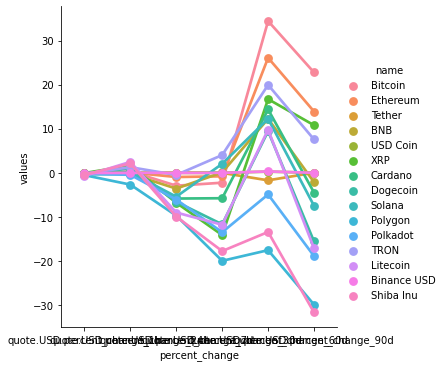

In [69]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [70]:
# now we are going to change several names inside 'percent_change'
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'], ['24h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'], ['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'], ['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'], ['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'], ['90d'])

In [71]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.22280
1,Bitcoin,24h,0.34590
2,Bitcoin,7d,-2.92083
3,Bitcoin,30d,-2.23840
4,Bitcoin,60d,34.41265
5,Bitcoin,90d,22.76201
6,Ethereum,1h,-0.28272
7,Ethereum,24h,0.08459
8,Ethereum,7d,-0.94760
9,Ethereum,30d,-0.78796


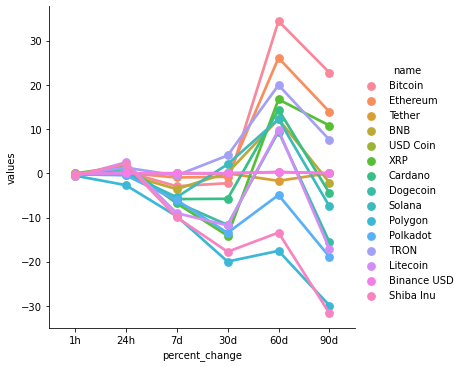

In [72]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [73]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19368793.00000,19368793.00000,False,nan,1,nan,nan,None,2023-05-10T03:31:00.000Z,27690.12037,14006574387.91512,-22.54350,-0.22280,0.34590,-2.92083,-2.23840,34.41265,22.76201,536324209551.81427,46.96730,581492527726.84998,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
1,1027,Ethereum,ETH,ethereum,6855,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120317700.84569,120317700.84569,False,nan,2,nan,nan,None,2023-05-10T03:31:00.000Z,1844.65327,6087257100.65437,-31.41940,-0.28272,0.08459,-0.94760,-0.78796,26.08133,13.90636,221944440829.38834,19.43630,221944440829.39001,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
2,825,Tether,USDT,tether,53054,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,82479410640.99255,86090638896.21469,False,nan,3,nan,nan,None,2023-05-10T03:31:00.000Z,1.00045,21899713182.00191,-28.14060,-0.01667,-0.04195,0.01333,-0.01203,-1.70281,0.03326,82516720042.42761,7.22340,86129581829.75000,None,2023-05-10T03:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 03:33:41.834089
3,1839,BNB,BNB,bnb,1347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,155860823.16433,155860823.16433,False,nan,4,nan,nan,None,2023-05-10T03:31:00.000Z,313.22807,460180323.82267,-23.31560,-0.14939,-0.23888,-3.57662,0.09951,12.25539,-2.10900,48819984360.48805,4.27530,48819984360.49000,None,2023-05-10T03:31:00.000Z,nan,NaN,NaN,NaN,NaN,2023-05-10 03:33:41.834089
4,3408,USD Coin,USDC,usd-coin,12301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,30151774997.20993,30151774997.20993,False,nan,5,nan,nan,None,2023-05-10T03:31:00.000Z,1.00002,2944810223.96042,-27.21420,-0.00590,0.00069,0.01546,0.02328,0.26553,0.03443,30152302967.03406,2.64050,30152302967.03000,None,2023-05-10T03:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 03:33:41.834089


In [77]:
df8 = dfApi[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,27690.120367945194,2023-05-10 03:33:21.734865
1,Ethereum,1844.6532743676348,2023-05-10 03:33:21.734865
2,Tether,1.0004523480605052,2023-05-10 03:33:21.734865
3,BNB,313.22806699804676,2023-05-10 03:33:21.734865
4,USD Coin,1.0000175104060767,2023-05-10 03:33:21.734865
5,XRP,0.43253665657128965,2023-05-10 03:33:21.734865
6,Cardano,0.3643934050846764,2023-05-10 03:33:21.734865
7,Dogecoin,0.07319623734459367,2023-05-10 03:33:21.734865
8,Solana,20.696286155037917,2023-05-10 03:33:21.734865
9,Polygon,0.8755516654997151,2023-05-10 03:33:21.734865


In [78]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,27690.120367945194,2023-05-10 03:33:21.734865
16,Bitcoin,27690.120367945194,2023-05-10 03:33:41.834089


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

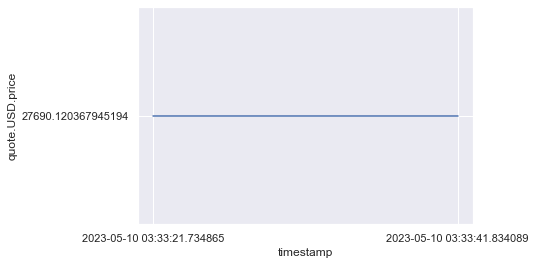

In [80]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)
# notice that since our sleep time is really short, we actually see a flat line here; but you can see how this can be done